Cifar-10 Project 1 (val 88%)

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

Data uploading  

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

Data Prerposessing

In [3]:
# Normalization
x_train=x_train/.255

x_test=x_test/.255

#One-hot encoding
y_train = tf.keras.utils.to_categorical(np.array(y_train))
y_test = tf.keras.utils.to_categorical(np.array(y_test))

In [4]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=30)

Model 정의(CNN 기반)

In [5]:
def get_model():
    
    model=Sequential([
        Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)),
        BatchNormalization(),
        Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=128,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.3),

        Conv2D(filters=256,kernel_size=(3,3),padding='same',kernel_initializer='he_normal',activation='relu'),
        BatchNormalization(),
        Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
        MaxPooling2D(pool_size=(2,2)),
        Dropout(0.2),

        Flatten(),
        
        Dense(units=128,activation='relu'),
        BatchNormalization(),
        Dense(units=64,activation='relu'),
        Dropout(0.3),
        Dense(units=10,activation='softmax') 
    ])


    lr_rate=tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 100000, 0.96, staircase=False, name=None)

    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_rate,decay=0.0001),loss='categorical_crossentropy',metrics=['acc'],)

    return model

Callback 함수 정의

In [6]:
model_checkpoint_best_path=r'D:\GitHub_repo\Coursera\save_weights/'
model_checkpoint_best=ModelCheckpoint(filepath=model_checkpoint_best_path,monitor='val_acc',save_best_only=True,save_weights_only=True,save_freq='epoch')
early_stopping=EarlyStopping(monitor='val_acc',patience=20,min_delta=1e-4)

In [7]:
log_dir=r'D:\GitHub_repo\Coursera\log_dir\log_dir_cifar10_1'
tensorboard_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

Model 개요

In [17]:
model=get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       1

Model 학습

In [7]:
model=get_model()
history=model.fit(x_train,y_train,epochs=2,batch_size=32,validation_data=(x_val,y_val),verbose=1,callbacks=[model_checkpoint_best,early_stopping])

Epoch 1/2
1407/1407 [==============================] - 38s 25ms/step - loss: 1.4766 - acc: 0.4679 - val_loss: 1.4764 - val_acc: 0.5298
Epoch 2/2
1407/1407 [==============================] - 34s 24ms/step - loss: 0.9576 - acc: 0.6704 - val_loss: 0.9386 - val_acc: 0.6876


In [ ]:
model=get_model()
model.load_weights(model_checkpoint_best_path)
test_loss,test_acc=model.evaluate(x=x_val,y=y_val,verbose=1)

157/157 [==============================] - 2s 9ms/step - loss: 0.8078 - acc: 0.8844


Train 및 Validation acc 시각화

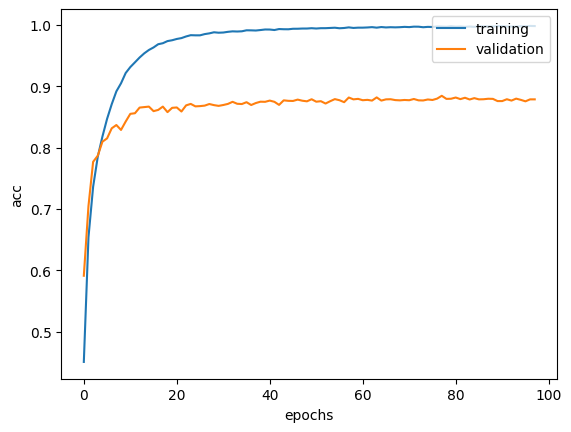

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['training','validation'],loc='upper right')
plt.show()

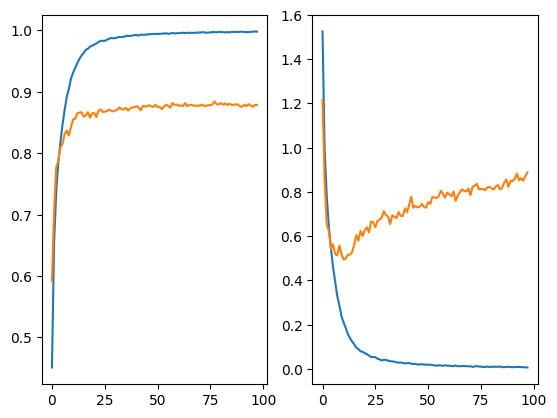

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Test dataset 검증

In [ ]:
test_loss,test_acc=model.evaluate(x=x_test,y=y_test,verbose=1)

NameError: name 'model' is not defined